In [70]:
#Train a neural network to recognize images of letters A, B and C

In [71]:
#dataset 

#A 
a= [0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]

#B
b= [0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0]

#C
c= [0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]

In [72]:
# CREATE LABELS
y = [[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]
     

In [73]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

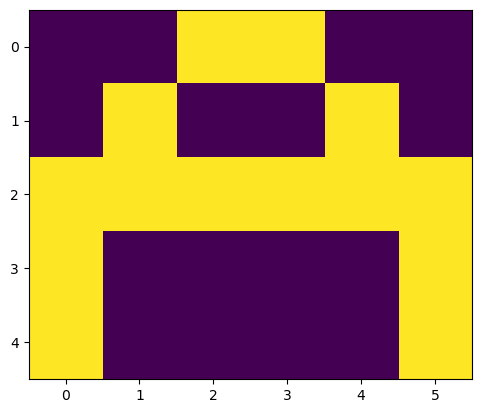

In [74]:
# visualize thz data
plt.imshow(np.array(a).reshape(5,6))
plt.show

In [75]:
# convert data and labels into numpy arrays
x= [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
x = np.vstack(x)  # Combine into one array
y = np.array(y)
print(x, '\n\n', y)


[[0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1]
 [0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]
 [0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0]] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [76]:
# input (1,30)
#hidden (1, 5)
#output(3,3)

In [77]:
#activation function
def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [78]:
#creation of forword neural network
def f_forward(x, w1, w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)


In [79]:
# Initialize the weights
def generate_wt(x, y):
    return np.random.randn(x, y)


In [80]:
# Loss function
def loss(out, Y):
    s = np.square(out - Y)
    s = np.sum(s) / len(Y)
    return s

In [81]:
#back propagation
def back_prop(x, y, w1, w2, alpha):
    #hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2 - y)
    d1 = np.multiply((w2.dot(d2.T)).T, np.multiply(a1, 1 - a1))

    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 - (alpha*(w1_adj))
    w2 = w2 - (alpha*(w2_adj))

    return (w1, w2)


In [82]:
# Training function
def train(x, Y, w1, w2, alpha=0.01, epochs=10):
    acc = []
    losses = []
    for j in range(epochs):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i].reshape(1, -1), w1, w2)  # Reshape x[i] to 2D array
            l.append(loss(out, Y[i]))
            w1, w2 = back_prop(x[i].reshape(1, -1), Y[i], w1, w2, alpha)  # Reshape x[i] to 2D array
        avg_loss = sum(l) / len(x)
        accuracy = (1 - avg_loss) * 100
        print(f"Epoch: {j + 1}, Accuracy: {accuracy:.2f}%, Loss: {avg_loss:.4f}")
        acc.append(accuracy)
        losses.append(avg_loss)
    return acc, losses, w1, w2


In [83]:
# Prediction function
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    prediction = np.argmax(out)
    if prediction == 0:
        print("Image is of letter A")
    elif prediction == 1:
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [84]:
# Initialize weights
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

In [85]:
# Train the network
acc, losses, w1, w2 = train(x, y, w1, w2, alpha=0.1, epochs=100)

Epoch: 1, Accuracy: 66.84%, Loss: 0.3316
Epoch: 2, Accuracy: 68.76%, Loss: 0.3124
Epoch: 3, Accuracy: 70.46%, Loss: 0.2954
Epoch: 4, Accuracy: 72.06%, Loss: 0.2794
Epoch: 5, Accuracy: 73.55%, Loss: 0.2645
Epoch: 6, Accuracy: 74.85%, Loss: 0.2515
Epoch: 7, Accuracy: 75.95%, Loss: 0.2405
Epoch: 8, Accuracy: 76.90%, Loss: 0.2310
Epoch: 9, Accuracy: 77.73%, Loss: 0.2227
Epoch: 10, Accuracy: 78.48%, Loss: 0.2152
Epoch: 11, Accuracy: 79.17%, Loss: 0.2083
Epoch: 12, Accuracy: 79.82%, Loss: 0.2018
Epoch: 13, Accuracy: 80.43%, Loss: 0.1957
Epoch: 14, Accuracy: 81.01%, Loss: 0.1899
Epoch: 15, Accuracy: 81.57%, Loss: 0.1843
Epoch: 16, Accuracy: 82.10%, Loss: 0.1790
Epoch: 17, Accuracy: 82.61%, Loss: 0.1739
Epoch: 18, Accuracy: 83.09%, Loss: 0.1691
Epoch: 19, Accuracy: 83.55%, Loss: 0.1645
Epoch: 20, Accuracy: 83.98%, Loss: 0.1602
Epoch: 21, Accuracy: 84.39%, Loss: 0.1561
Epoch: 22, Accuracy: 84.78%, Loss: 0.1522
Epoch: 23, Accuracy: 85.14%, Loss: 0.1486
Epoch: 24, Accuracy: 85.48%, Loss: 0.1452
E

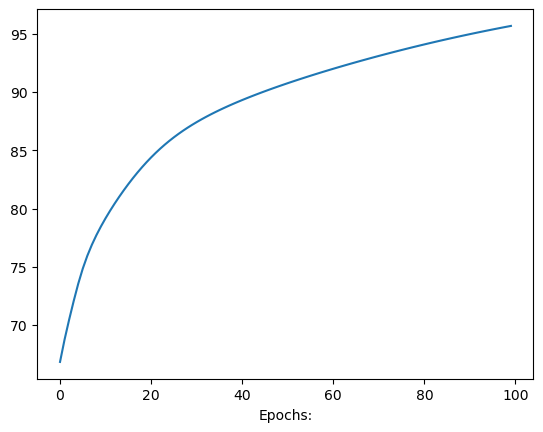

In [86]:
import matplotlib.pyplot as plt

#plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs:')
plt.show()

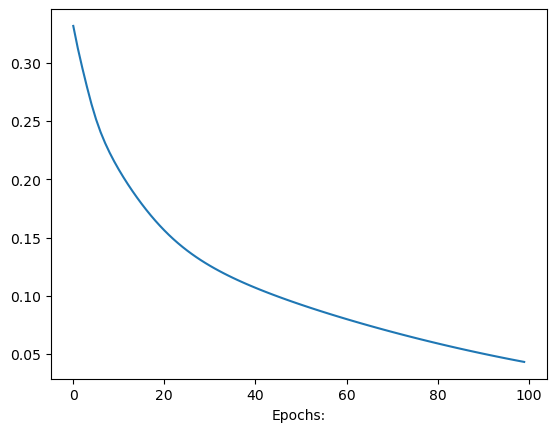

In [87]:
#plotting loss
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epochs:')
plt.show()

Image is of letter C


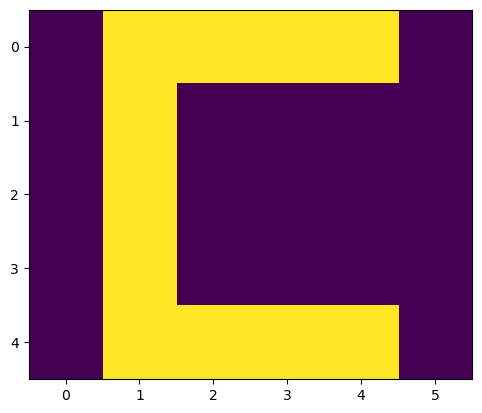

In [88]:
# Predicting on a sample
predict(x[2], w1, w2)

Image is of letter B


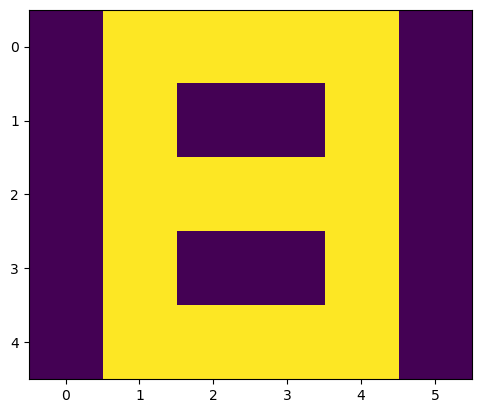

In [89]:
predict(x[1], w1, w2)

Image is of letter A


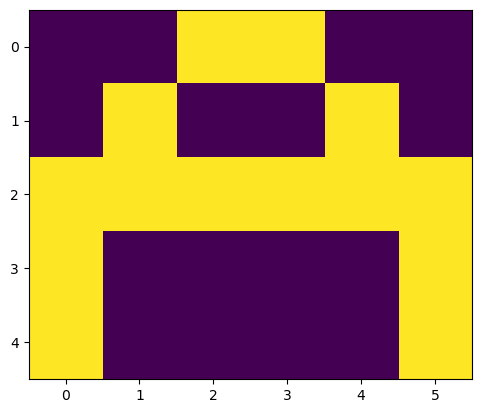

In [90]:
predict(x[0], w1, w2)